In [19]:
import numpy as np
import mxnet as mx
import time
import pandas as pd

import cv2

import logging
logging.getLogger().setLevel(logging.DEBUG)  # logging to stdout

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

In [23]:
# Load the trained model
sym, arg_params, aux_params = mx.model.load_checkpoint('models/chkpt', 210)
model = mx.mod.Module(symbol=sym, context=mx.cpu(), label_names=None)
model.bind(for_training=False, data_shapes=[('data', (1,3,200,200))], 
         label_shapes=model._label_shapes)
model.set_params(arg_params, aux_params, allow_missing=True)

In [14]:
# Load the gesture mappings:
import json

num_to_ges = None
with open('num2ges.json') as fin:
    num_to_ges = json.load(fin, encoding='ascii')
num_to_ges

{u'0': u' lc',
 u'1': u' lo',
 u'10': u' mc',
 u'11': u' mo',
 u'12': u' mq',
 u'13': u' mw',
 u'14': u' me',
 u'15': u' m1',
 u'16': u' m2',
 u'17': u' m3',
 u'18': u' m4',
 u'19': u' m5',
 u'2': u' lq',
 u'20': u' rc',
 u'21': u' ro',
 u'22': u' rq',
 u'23': u' rw',
 u'24': u' re',
 u'25': u' r1',
 u'26': u' r2',
 u'27': u' r3',
 u'28': u' r4',
 u'29': u' r5',
 u'3': u' lw',
 u'4': u' le',
 u'5': u' l1',
 u'6': u' l2',
 u'7': u' l3',
 u'8': u' l4',
 u'9': u' l5'}

In [28]:
def get_processed_image(img):

#     img = cv2.imread(im_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2YCR_CB)
    res = cv2.resize(gray,(200, 200), interpolation=cv2.INTER_CUBIC)

    res = np.swapaxes(res, 0, 2)
    res = np.swapaxes(res, 1, 2)
    res = res[np.newaxis, :]

    return res

In [29]:
from collections import namedtuple
Batch = namedtuple('Batch', ['data'])

def predict(img):
    im = get_processed_image(img)
    
    mod.forward(Batch([mx.nd.array(im)]))
    
    prob = mod.get_outputs()[0].asnumpy()
    
    prob = np.squeeze(prob)
    
    a = np.argsort(prob)[::-1]
    
    for i in a[:5]:
        idx = str(i)
        print('probability=%f, class=%s' %(prob[i], num_to_ges[idx]))

In [24]:
data0 = pd.read_csv('full_hand_data.csv')#, names=['name','state'])

In [26]:
data0.tail()

name  state
2155  data/fdata4/hand_pic/a_c84316f5_656_r1.jpg     25
2156  data/fdata4/hand_pic/a_c84316f5_657_r2.jpg     26
2157  data/fdata4/hand_pic/a_c84316f5_658_r3.jpg     27
2158  data/fdata4/hand_pic/a_c84316f5_660_r4.jpg     28
2159  data/fdata4/hand_pic/a_c84316f5_661_r5.jpg     29

In [47]:
one_test = data0['name'].values[-1]

one_label = data0['state'].values[-1]

one_test, one_label

('data/fdata4/hand_pic/a_c84316f5_661_r5.jpg', 29)

In [48]:
img = cv2.imread(one_test)

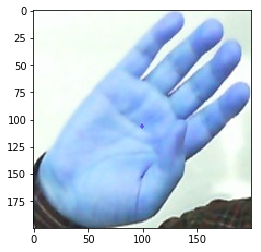

In [49]:
plt.imshow(img)

In [50]:
predict(img)

probability=0.955434, class= r5
probability=0.029900, class= ro
probability=0.005476, class= r4
probability=0.003016, class= r2
probability=0.001262, class= r1


In [52]:
num_to_ges[str(one_label)]

u' r5'

In [17]:
# num_class = len(data0['state'].unique())
# ges_to_num = dict({(g,i) for i, g in enumerate(data0['state'].unique())})
# num_to_ges = dict({(i,g) for i, g in enumerate(data0['state'].unique())})
# num_class, ges_to_num

In [18]:
# data0 = data0.replace({'state':ges_to_num})

In [6]:
# labels = np.empty((data0.shape[0]))

# res_width, res_height = 200, 200
# imgs = np.empty(shape=(data0.shape[0],1,res_width,res_height))
# imgs.shape, labels.shape

((300, 1, 200, 200), (300,))

In [7]:
# prefix = 'fdata/pic/'
# outfix = 'fdata/bi_pic/'
# for i, (im_name, state) in enumerate(data0.values):
#     im_path = prefix + im_name
# #     print im_path
#     img = cv2.imread(im_path)
#     gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#     res = cv2.resize(gray,(200, 200), interpolation=cv2.INTER_CUBIC)

#     imgs[i][0] = res
#     labels[i] = state

In [8]:
# metric = mx.metric.Accuracy()

In [9]:
# train_data, train_label = imgs, labels
# # test_data, test_label = imgs[23:], labels[2:]
# train_data.shape, train_label.shape#, test_data.shape, test_label.shape

((300, 1, 200, 200), (300,))

In [52]:
# batch_size = 10
# train_iter = mx.io.NDArrayIter(train_data, train_label, batch_size, shuffle=True)
# # eval_iter = mx.io.NDArrayIter(test_data, test_label, batch_size)

In [53]:
# chk_prefix='models/chkpt'
# sym, arg_params, aux_params = mx.model.load_checkpoint(chk_prefix,200)

In [54]:
# model = mx.mod.Module(symbol=sym, context=mx.gpu(), label_names=None)

In [55]:
# model.bind(for_training=False, data_shapes=[('data', (1,1,200,200))], 
#          label_shapes=model._label_shapes)

In [56]:
# model.set_params(arg_params, aux_params, allow_missing=True)

In [1]:
# m = model.predict(train_iter).asnumpy()

In [50]:
# true = 0
# cnt = 0
# for prob, l in zip(m, train_label):
#     prob = np.squeeze(prob)
#     pred = np.argsort(prob)[::-1][-1]
# #     print pred
# #     pred = np.argsort(p)[0]
#     lab = int(l)
#     cnt += 1
#     if pred == lab:
#         true += 1
        

In [51]:
# true, cnt

(15, 300)